In [ ]:
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [3]:
dp=pd.read_csv('housing.csv')

In [4]:
print(dp)

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [7]:
X = dp[["MedianHouseValue","Latitude","Longitude"]]
print(X)

,MedianHouseValue,Latitude,Longitude
0,4.526,37.88,-122.23
1,3.585,37.86,-122.22
2,3.521,37.85,-122.24
3,3.413,37.85,-122.25
4,3.422,37.85,-122.25
...,...,...,...
20635,0.781,39.48,-121.09
20636,0.771,39.49,-121.21
20637,0.923,39.43,-121.22
20638,0.847,39.43,-121.32


In [ ]:
Y=X

In [9]:
def solve(k):
	Centroids = (X.sample(n=k))
	diff = 1
	j=0
	itera=0
	while(diff!=0):
		if(itera==15):
			break
		XD=X
		i=1
		for index1,row_c in Centroids.iterrows():
			close=[]
			for index2,row_d in XD.iterrows():
				d1=(row_c["MedianHouseValue"]-row_d["MedianHouseValue"])**2
				d2=(row_c["Latitude"]-row_d["Latitude"])**2
				d3=(row_c["Longitude"]-row_d["Longitude"])**2
				d=np.sqrt(d1+d2+d3)
				close.append(d)
			X[i]=close
			i=i+1
		C=[]
		for index,row in X.iterrows():
			min_dist=row[1]
			pos=1
			for i in range(k):
				if row[i+1] < min_dist:
					min_dist = row[i+1]
					pos=i+1
			C.append(pos)
		X["Cluster"]=C
		Centroids_new = X.groupby(["Cluster"]).mean()[["MedianHouseValue","Latitude","Longitude"]]
		if j == 0:
			diff=1
			j=j+1
		else:
			diff = (Centroids_new['MedianHouseValue'] - Centroids['MedianHouseValue']).sum() + (Centroids_new['Latitude'] - Centroids['Latitude']).sum()+(Centroids_new['Longitude'] - Centroids['Longitude']).sum()
			
		Centroids = X.groupby(["Cluster"]).mean()[["MedianHouseValue","Latitude","Longitude"]]
		itera=itera+1


In [ ]:

warnings.filterwarnings('ignore')

In [11]:
count=0

erp=[2,3,4,5,6]
for i in erp:
    solve(i)
    count=0
    print("WHEN VALUE OF K IS "+str(i))
    for r in range(1,i+1):
        count=0
        for index,row in X.iterrows():
            if(row["Cluster"]==r):
                count=count+1
        print("in Cluster number "+str(r)+" number of points is "+str(count))
    X=Y
            

WHEN VALUE OF K IS 2
in Cluster number 1 number of points is 8698
in Cluster number 2 number of points is 11942
WHEN VALUE OF K IS 3
in Cluster number 1 number of points is 11170
in Cluster number 2 number of points is 1819
in Cluster number 3 number of points is 7651
WHEN VALUE OF K IS 4
in Cluster number 1 number of points is 8505
in Cluster number 2 number of points is 2707
in Cluster number 3 number of points is 1792
in Cluster number 4 number of points is 7636
WHEN VALUE OF K IS 5
in Cluster number 1 number of points is 1724
in Cluster number 2 number of points is 8480
in Cluster number 3 number of points is 3196
in Cluster number 4 number of points is 2721
in Cluster number 5 number of points is 4519
WHEN VALUE OF K IS 6
in Cluster number 1 number of points is 1545
in Cluster number 2 number of points is 8492
in Cluster number 3 number of points is 3671
in Cluster number 4 number of points is 2502
in Cluster number 5 number of points is 2708
in Cluster number 6 number of points i

In [14]:
from sklearn.cluster import KMeans
scor=[]
for k in range(2,7):
    kmeans = KMeans(n_clusters = k).fit(Y)
    labels = kmeans.labels_
    scor.append(silhouette_score(Y, labels, metric = 'euclidean'))

In [15]:
print(scor)

[0.6435345409944606, 0.5538911322926412, 0.536840690762243, 0.5132656997052341, 0.527104213818979]


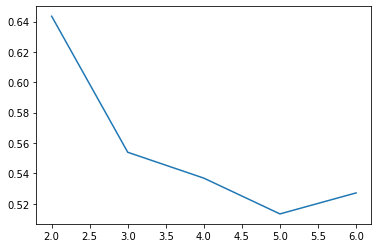

In [16]:

y=[2,3,4,5,6]
plt.plot(y, scor)
plt.show()

plt.close()

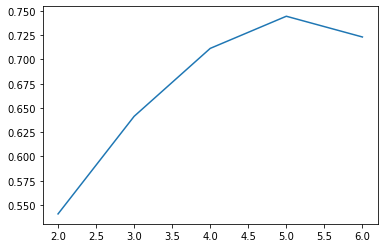

In [17]:
from sklearn.metrics import davies_bouldin_score
scor_davies=[]
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=30)
    labels = kmeans.fit_predict(Y)
    scor_davies.append(davies_bouldin_score(X, labels))
    
plt.plot(y,scor_davies)
plt.show()
plt.close()

In [ ]:
'''SO K=2 COMES OUT TO BE THE MOST OPTIMAL VALUE,
    in silhouette score we see that highest value is at k=2 and in davies bouldin score is lowest at k=2 so 2 is the most optimum value
'''
%pip install seaborn

In [19]:
import seaborn as sns

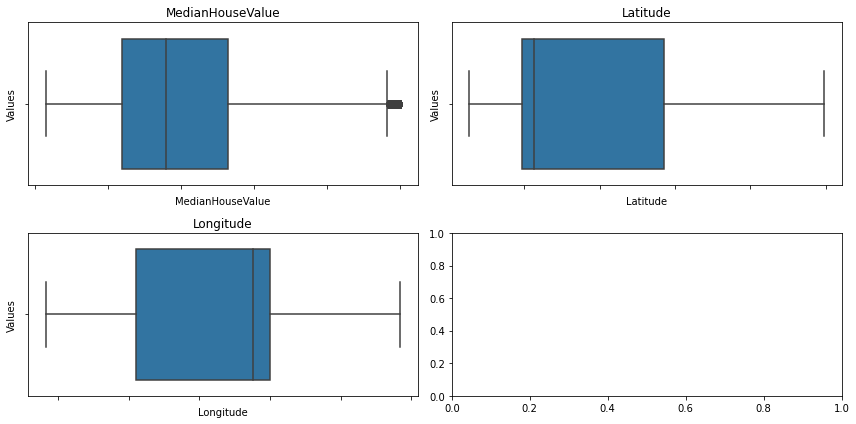

In [20]:

fig, ax = plt.subplots(2, 2, figsize=(12,6))
sns.boxplot(dp.MedianHouseValue, orient='v', ax=ax[0][0])
ax[0][0].set_title('MedianHouseValue')
ax[0][0].set_ylabel('Values')
ax[0][0].set_yticklabels([])
ax[0][0].set_xticklabels([])
sns.boxplot(dp.Latitude, orient='v', ax=ax[0][1])
ax[0][1].set_title('Latitude')
ax[0][1].set_ylabel('Values')
ax[0][1].set_yticklabels([])
ax[0][1].set_xticklabels([])
sns.boxplot(dp.Longitude, orient='v', ax=ax[1][0])
ax[1][0].set_title('Longitude')
ax[1][0].set_ylabel('Values')
ax[1][0].set_yticklabels([])
ax[1][0].set_xticklabels([])

plt.tight_layout()
plt.show()

In [21]:
'''We can easily see from the box plots that that the clusters are well separated across the majority of the "MedianHouseValue" '''